## Visualização de Dados

### Titanic

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic/train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjugue',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [5]:
data['Sexo'].replace({'male' : 'homem', 'female' : 'mulher'}, inplace=True)

In [6]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

In [7]:
data['Cabine']

0      NaN
1        C
2      NaN
3        C
4      NaN
5      NaN
6        E
7      NaN
8      NaN
9      NaN
10       G
11       C
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       D
22     NaN
23       A
24     NaN
25     NaN
26     NaN
27       C
28     NaN
29     NaN
      ... 
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabine, Length: 891, dtype: object

### Matplotlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

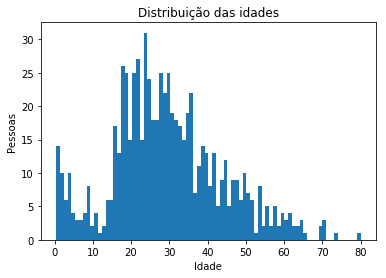

In [9]:
plt.hist(data['Idade'].dropna(), bins=80)
plt.title('Distribuição das idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')
plt.show()

In [10]:
data['Classe'].unique()

array([3, 1, 2])

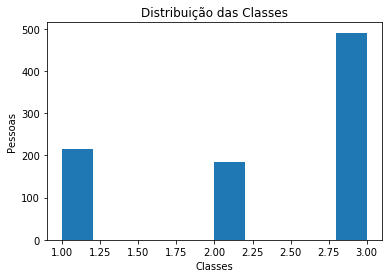

In [11]:
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

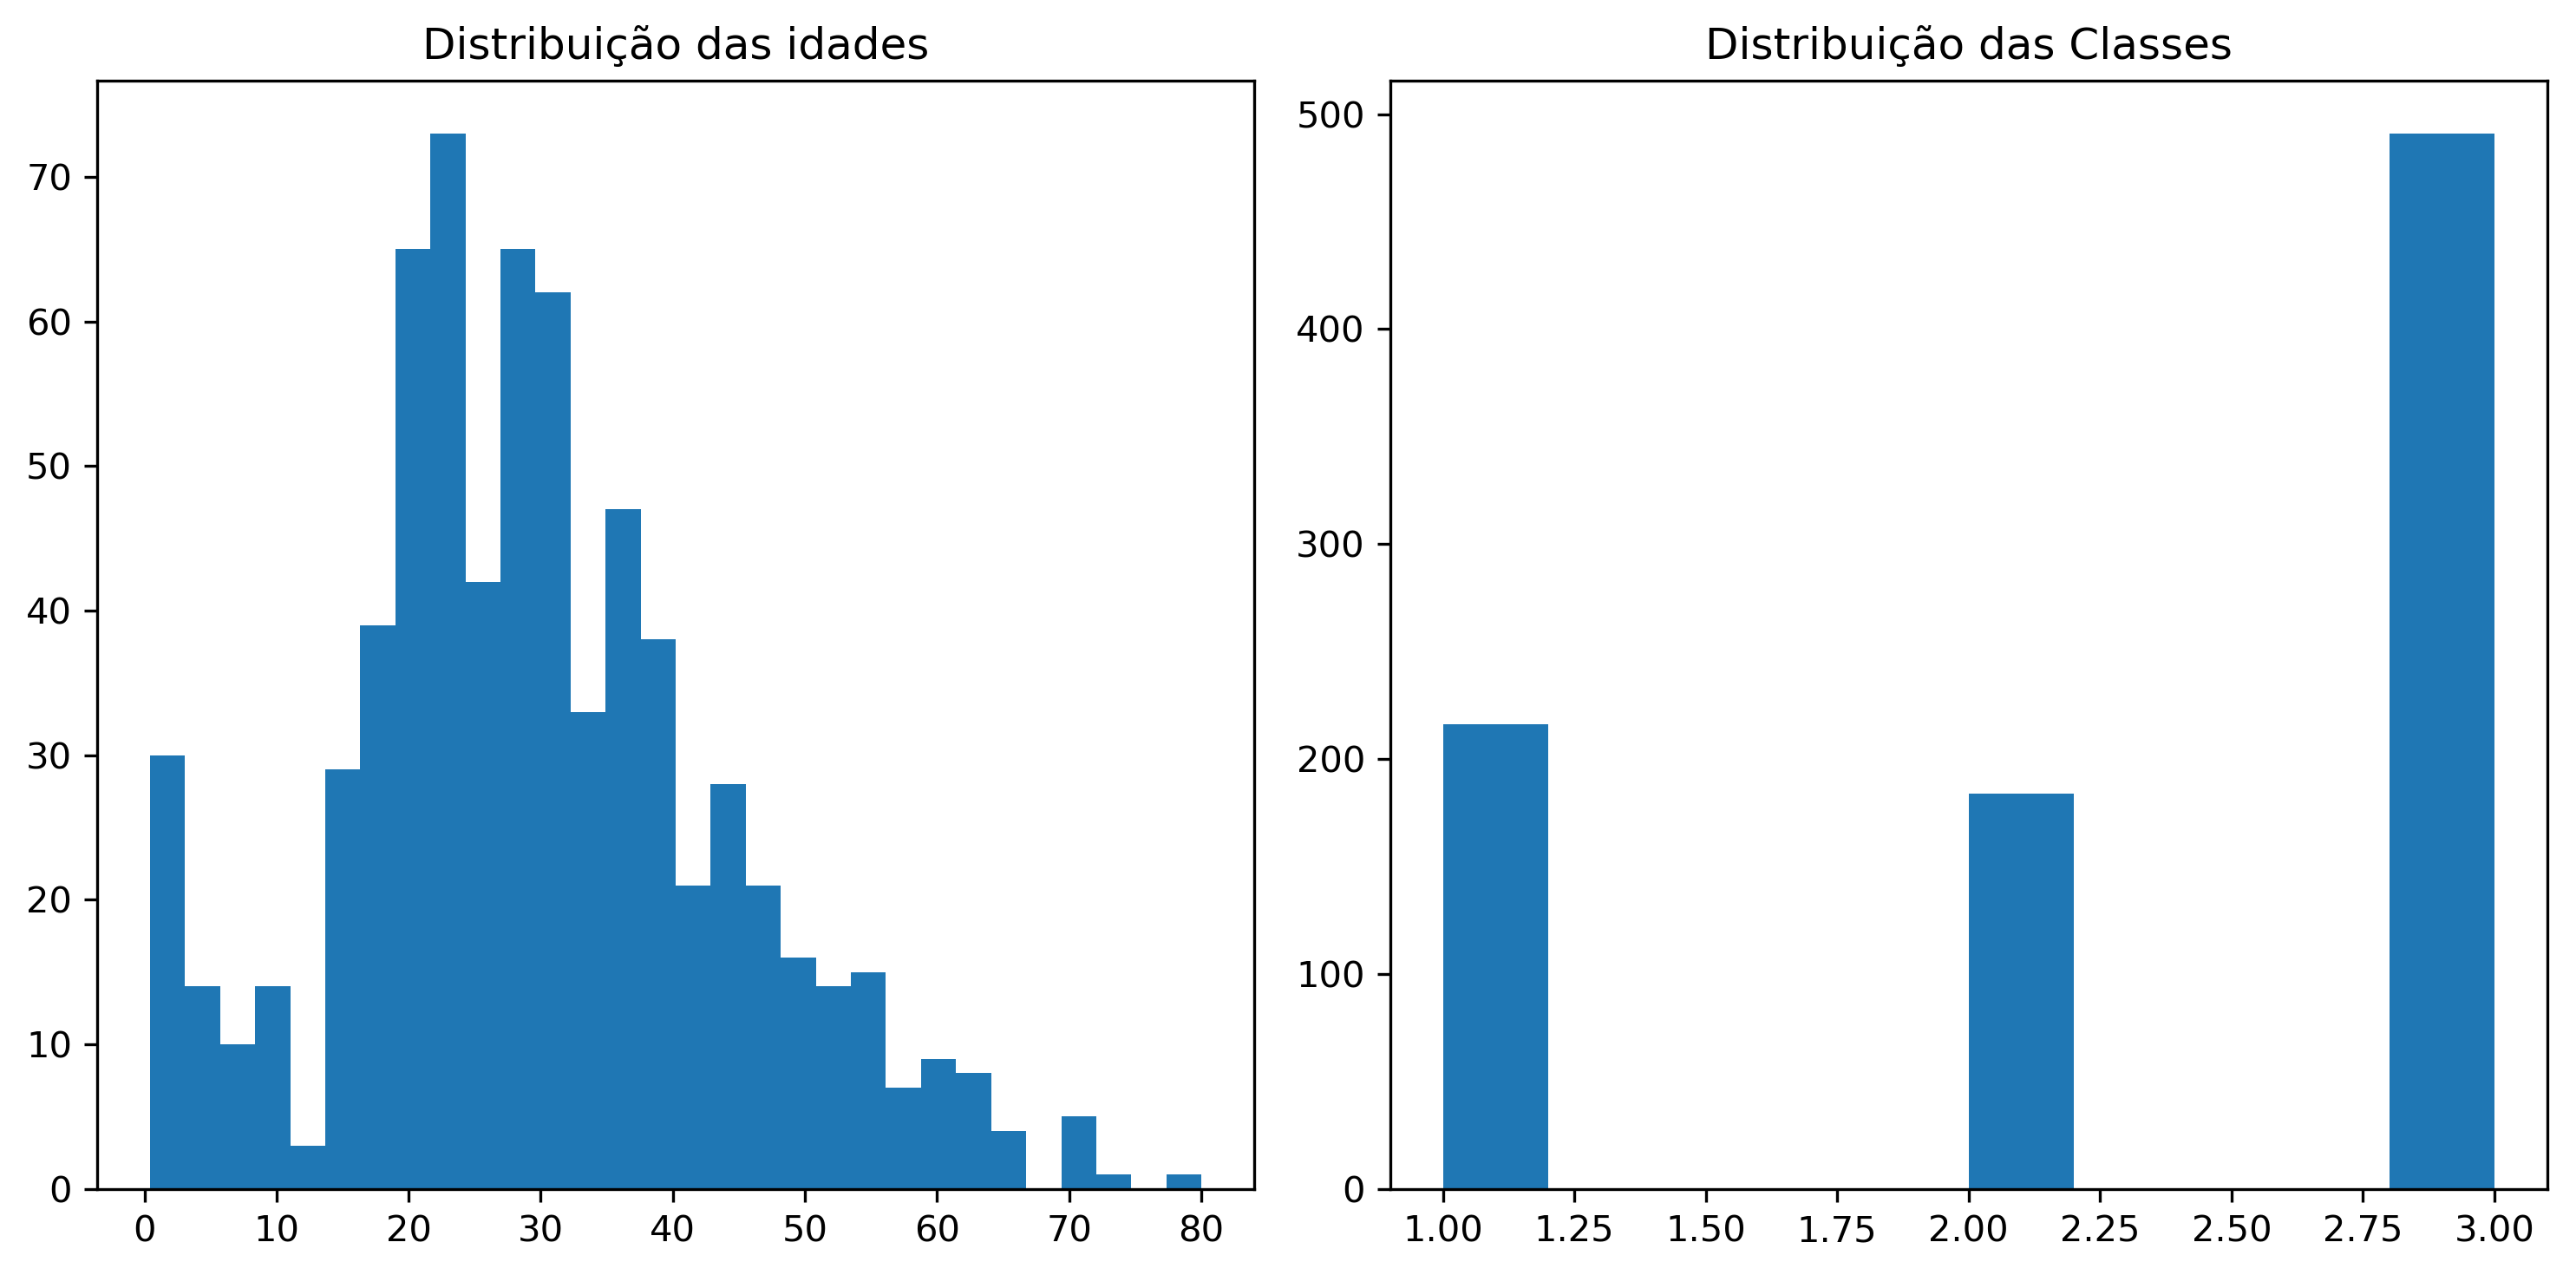

In [12]:
plt.figure(figsize=(10,5), dpi=300)
plt.subplot(1,2,1)
plt.hist(data['Idade'].dropna(), bins = 30)
plt.title('Distribuição das idades')

plt.subplot(1,2,2)
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')

plt.tight_layout()
plt.show()

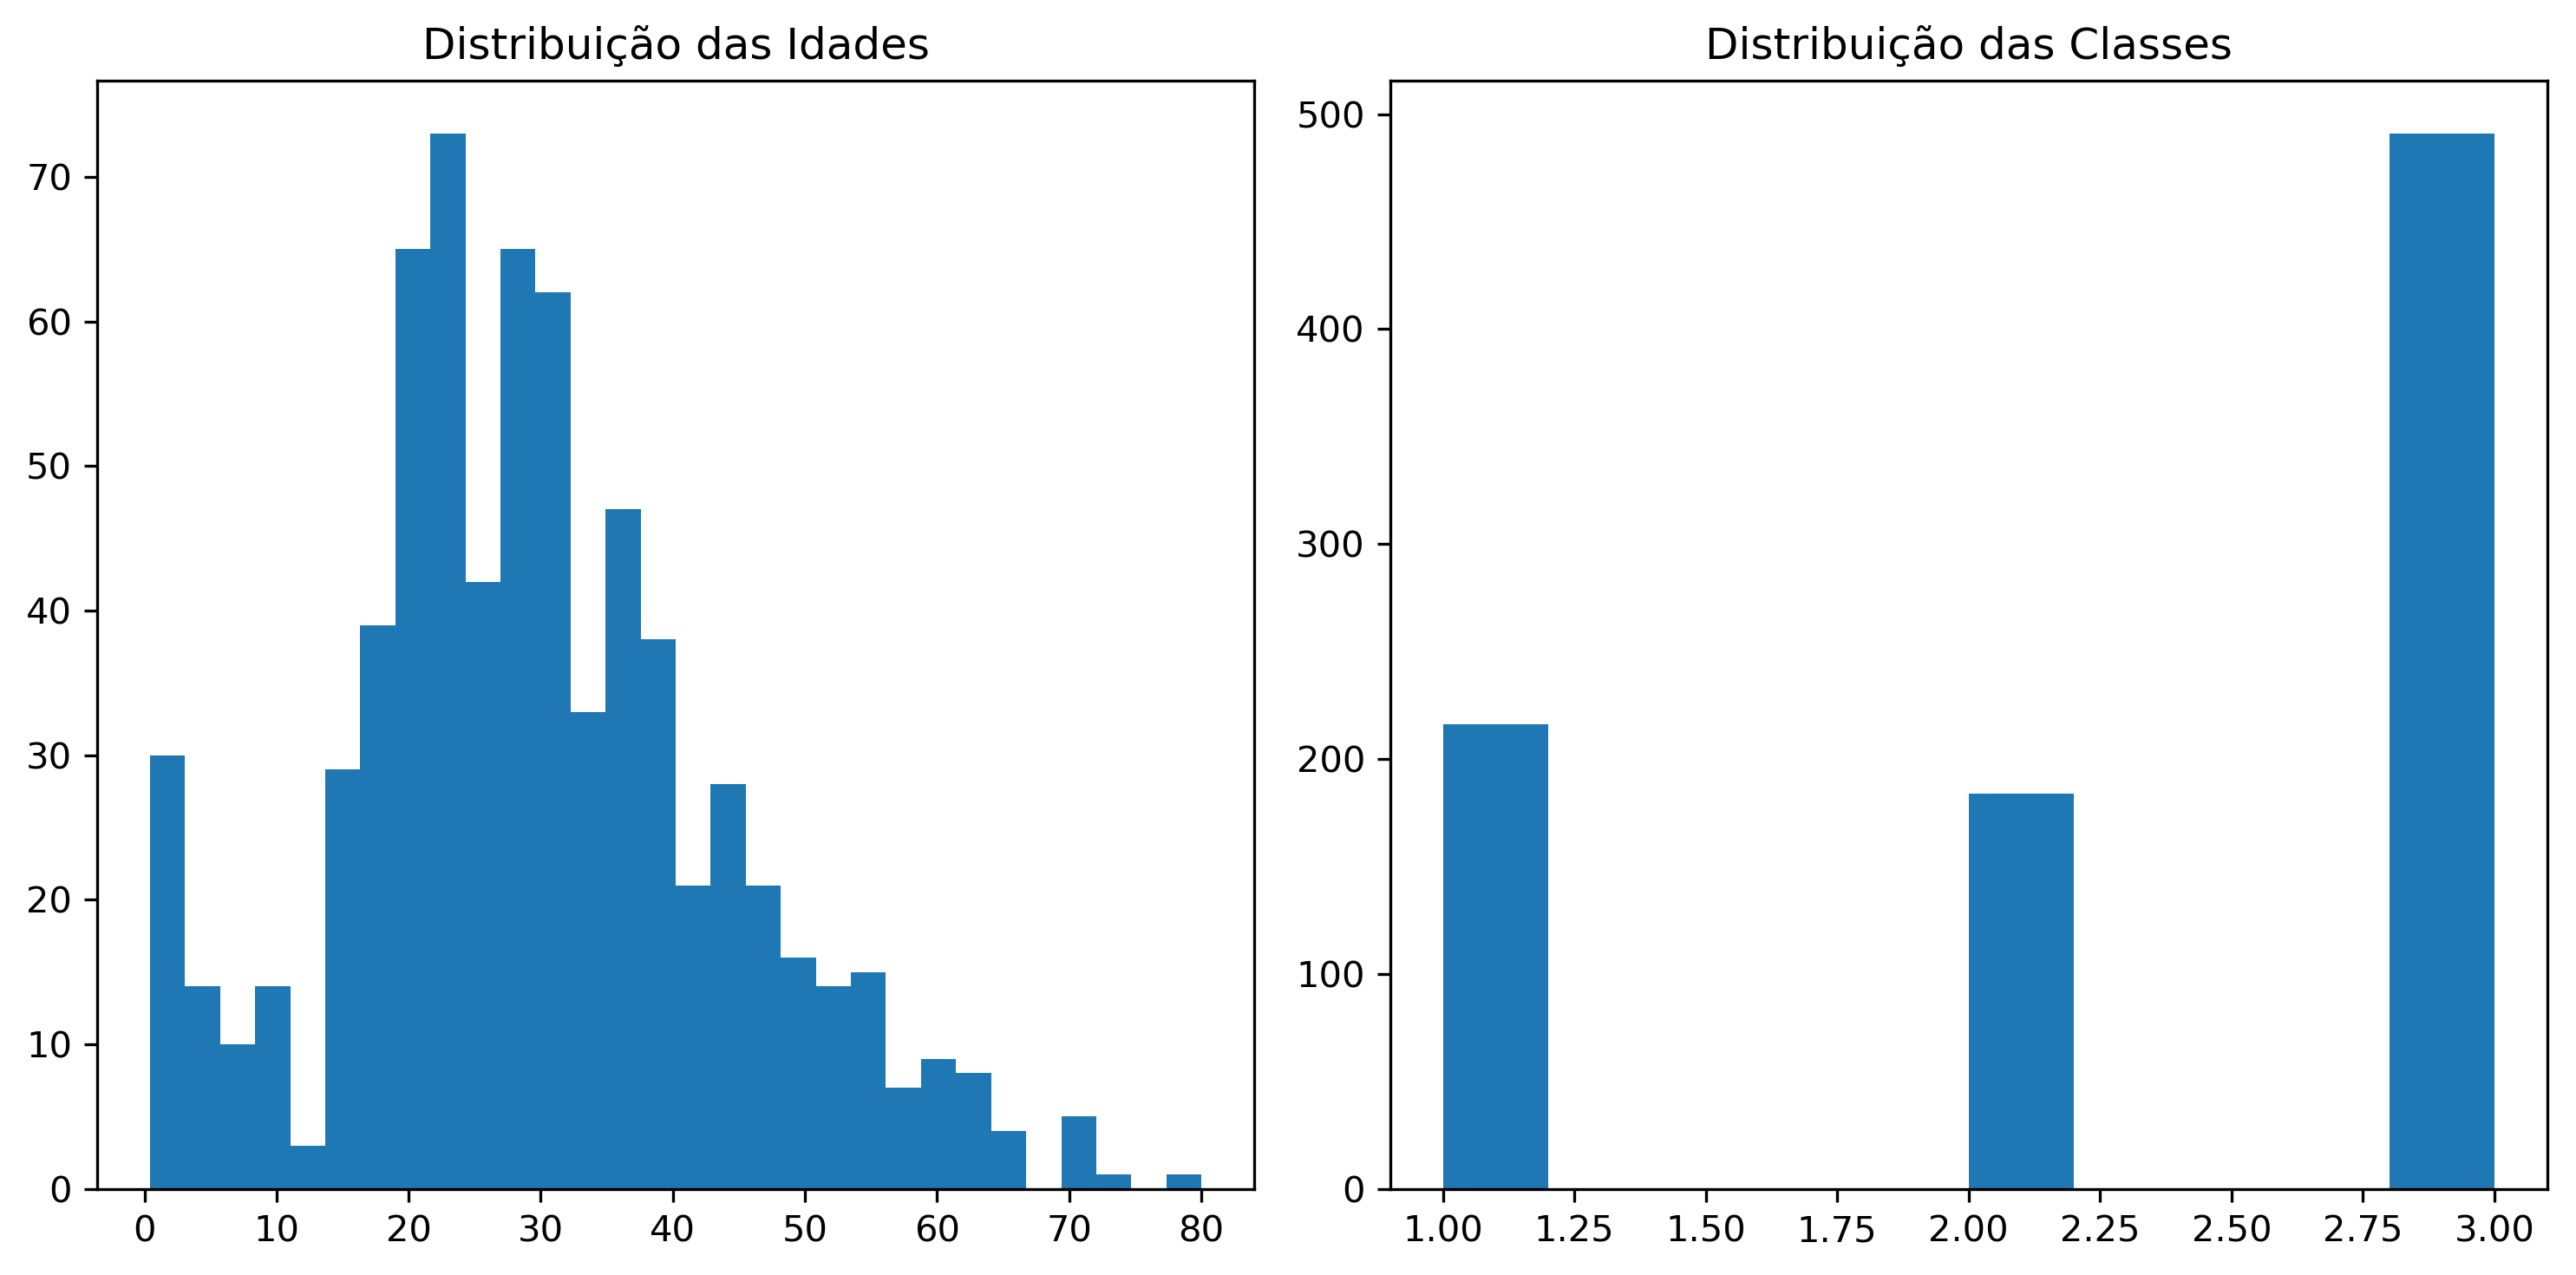

In [13]:
f, ax = plt.subplots(1, 2, figsize=(10,5), dpi=300)
ax[0].hist(data['Idade'].dropna(), bins=30)
ax[0].set_title('Distribuição das Idades')

ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Seaborn

In [14]:
import seaborn as sns

In [15]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [16]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

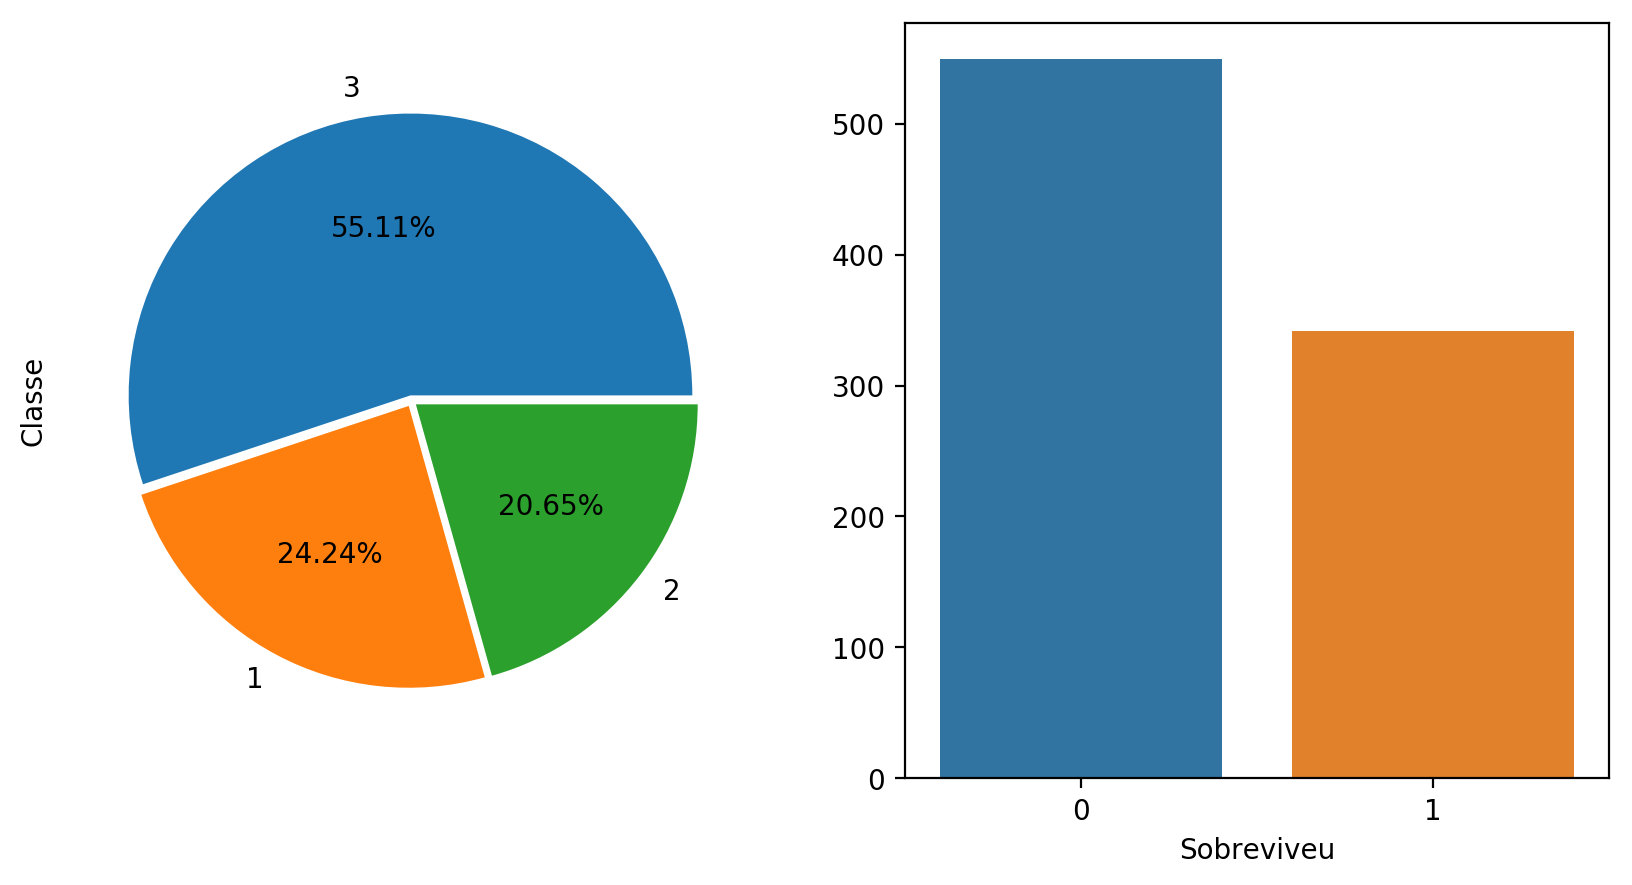

In [17]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=200)
data['Classe'].value_counts().plot.pie(ax=ax[0], explode=[0.02, 0.02, 0.02], autopct='%0.2f%%')

sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_ylabel('')
plt.show()

#### Countplot e hue

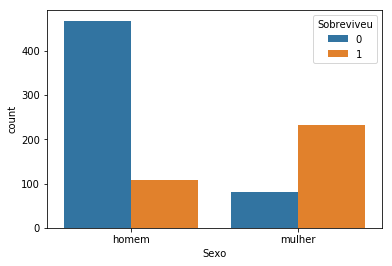

In [18]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

plt.show()

**Boxplot**

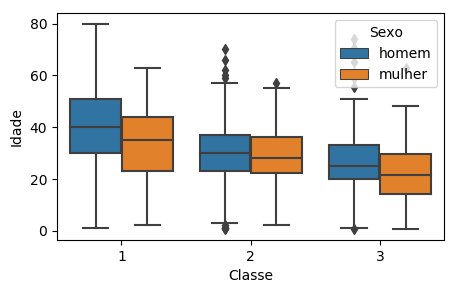

In [19]:
plt.figure(figsize=(5,3), dpi = 100)
sns.boxplot(x='Classe', y='Idade',hue='Sexo', data=data)

**Violinplot**

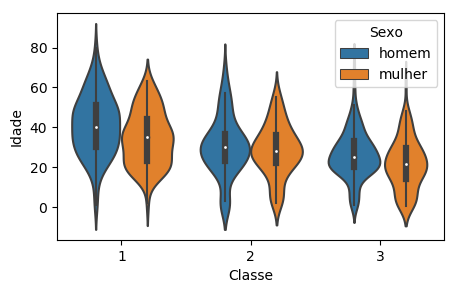

In [20]:
plt.figure(figsize=(5,3), dpi = 100)
sns.violinplot(x='Classe', y='Idade',hue='Sexo', data=data)

plt.show()

**FaceGrid com hist e barplot**

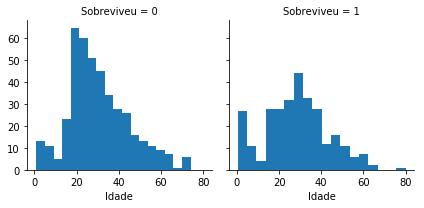

In [21]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

/home/ana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


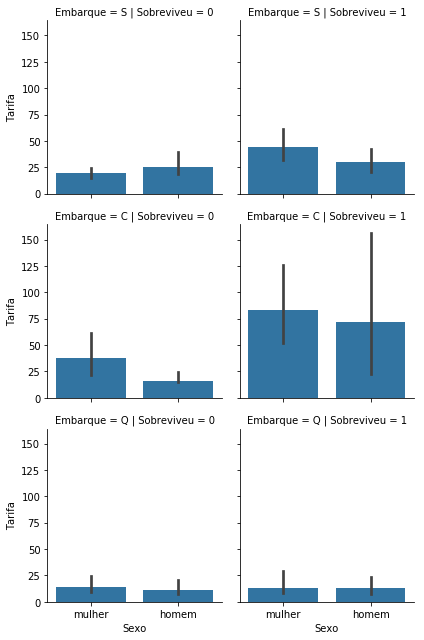

In [22]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa', ci=100)

plt.show()

**FacetGrid com distplot**

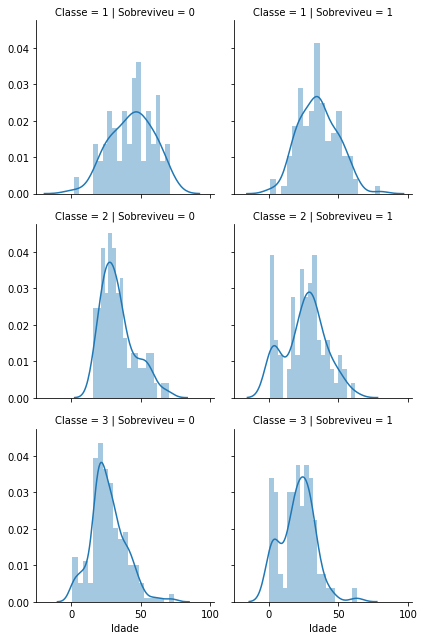

In [23]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe')
g.map(sns.distplot, 'Idade', bins=20)


**catplot do tipo "point"**

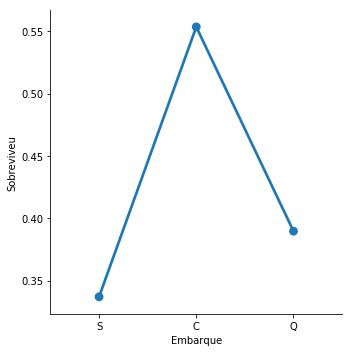

In [24]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point', ci=None)

plt.show()

In [25]:
data['Embarque'].value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

**FacetGrid com pointplot**

/home/ana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


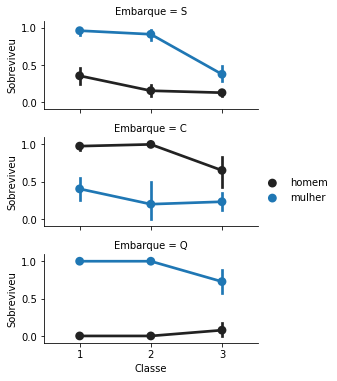

In [26]:
g = sns.FacetGrid(data, row='Embarque', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

plt.show()

**Heatmap de Dados Ausentes**

In [27]:
data.isnull().sum()

IdPassageiro        0
Sobreviveu          0
Classe              0
Nome                0
Sexo                0
Idade             177
IrmaosConjugue      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Cabine            687
Embarque            2
dtype: int64

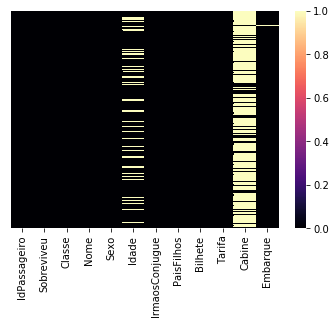

In [31]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='magma')

**Relplot**

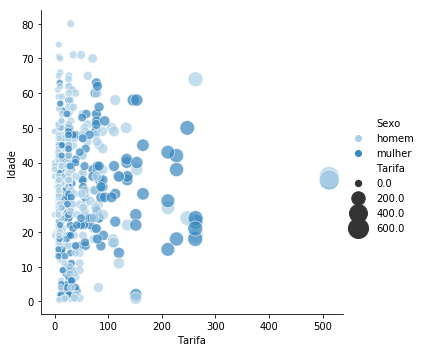

In [44]:
sns.relplot(x='Tarifa', y='Idade', hue='Sexo', data=data, size='Tarifa',
           sizes=(40,400), alpha=0.7, palette='Blues')

plt.show()

**Scatterplot**

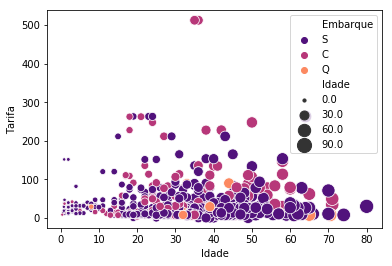

In [42]:
sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', size='Idade',
               palette='magma', data=data, sizes=(10,200))

plt.show()

**Pairplot**

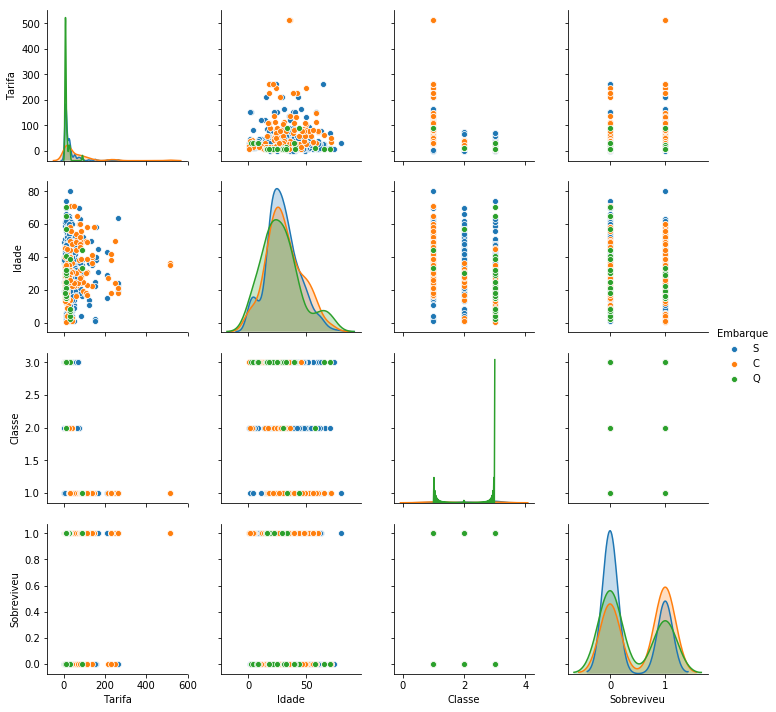

In [50]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque', 'Sobreviveu']],
             hue='Embarque')

plt.show()

**Jointplots**

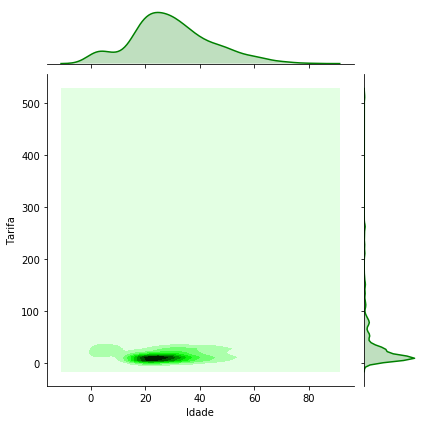

In [52]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g')

plt.show()

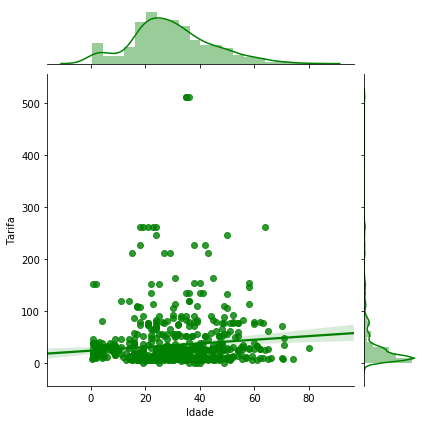

In [53]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

plt.show()

**Kdeplot**

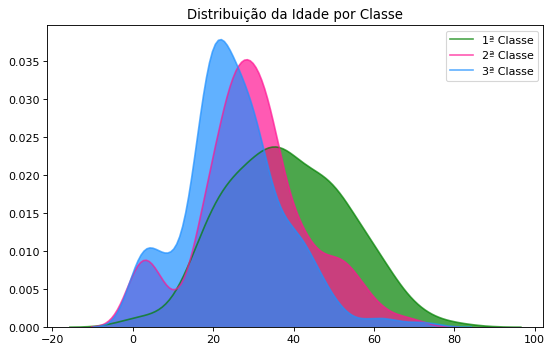

In [66]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True,
            color='g',label='1ª Classe', alpha=0.7)

sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, 
            color='deeppink',label='2ª Classe',alpha=0.7)

sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True,
            color='dodgerblue',label='3ª Classe',alpha=0.7)

plt.title('Distribuição da Idade por Classe')
plt.show()

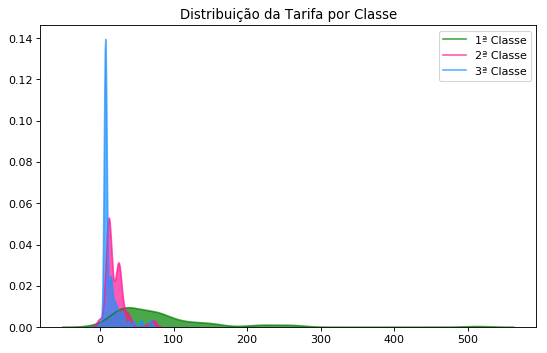

In [67]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==1], shade=True,
            color='g',label='1ª Classe', alpha=0.7)

sns.kdeplot(data['Tarifa'].loc[data['Classe']==2], shade=True, 
            color='deeppink',label='2ª Classe',alpha=0.7)

sns.kdeplot(data['Tarifa'].loc[data['Classe']==3], shade=True,
            color='dodgerblue',label='3ª Classe',alpha=0.7)

plt.title('Distribuição da Tarifa por Classe')
plt.show()

**Catplot, Count e Heatmap de
Correlações**

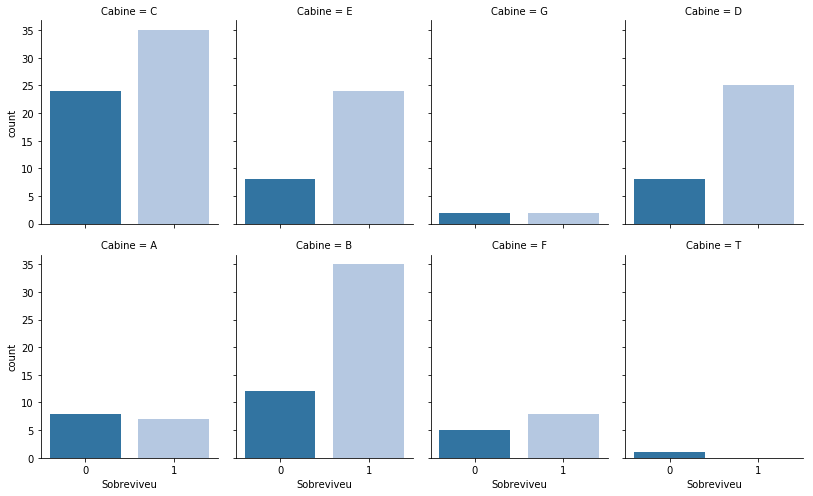

In [72]:
sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(),
           kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

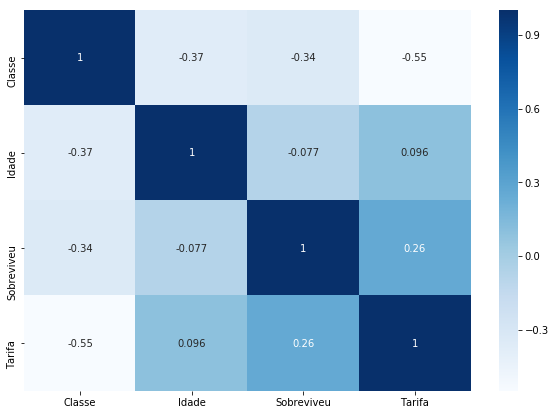

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(),
            cmap='Blues', annot=True)

plt.show()

In [78]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr()

,Classe,Idade,Sobreviveu,Tarifa
Classe,1.000000,-0.369226,-0.338481,-0.549500
Idade,-0.369226,1.000000,-0.077221,0.096067
Sobreviveu,-0.338481,-0.077221,1.000000,0.257307
Tarifa,-0.549500,0.096067,0.257307,1.000000


**Dados Artificiais**

In [79]:
x = np.random.normal(10,1,15)

In [80]:
x

array([ 8.1772908 ,  9.44937001, 10.99225345, 10.19426348,  7.69375559,
        8.9726462 ,  9.29121761,  8.49907761, 11.7295739 , 10.72381412,
       10.06561239, 10.86727457,  9.12730139,  9.90590787, 11.72130412])

In [81]:
len(x)

15

**Plot**

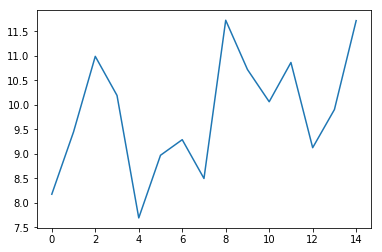

In [83]:
plt.plot(x)

plt.show()

**Linspace**

In [84]:
x = np.linspace(0,20,1000)

In [85]:
x

array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.54054054,  0.56056056,  0.58058058,
        0.6006006 ,  0.62062062,  0.64064064,  0.66066066,  0.68068068,
        0.7007007 ,  0.72072072,  0.74074074,  0.76076076,  0.78078078,
        0.8008008 ,  0.82082082,  0.84084084,  0.86086086,  0.88088088,
        0.9009009 ,  0.92092092,  0.94094094,  0.96096096,  0.98098098,
        1.001001  ,  1.02102102,  1.04104104,  1.06106106,  1.08108108,
        1.1011011 ,  1.12112112,  1.14114114,  1.16116116,  1.18118118,
        1.2012012 ,  1.22122122,  1.24124124,  1.26126126,  1.28128128,
        1.3013013 ,  1.32132132,  1.34134134,  1.36136136,  1.38

In [86]:
len(x)

1000

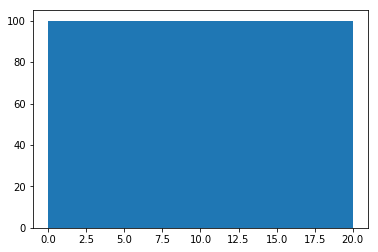

In [88]:
plt.hist(x)

plt.show()

In [102]:
y = 5*x**4 - 5*x - 1

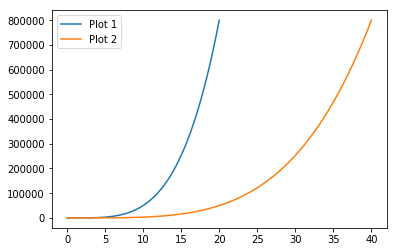

In [105]:
plt.plot(x,y, label='Plot 1')
plt.plot(x*2,y, label='Plot 2')

plt.legend()
plt.show()

**Normal**

In [106]:
y = np.random.normal(8,2,1000)

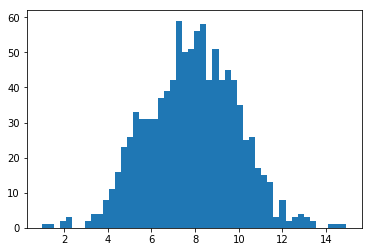

In [109]:
plt.hist(y, bins=50)

plt.show()

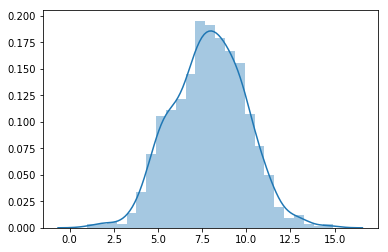

In [111]:
sns.distplot(y)

plt.show()

**Fontes:**

https://matplotlib.org/


https://seaborn.pydata.org/